In [6]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import h5py
import os
import time

from util import *
from data_loader import * 
import scdd as sd

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
data = load_10x_1k()
sc.pp.filter_genes(data,min_counts=data.shape[0])

# unit test of  sd.sf

Nr=9049
gamma_c [0.33415291 0.33439954 0.33661929 4.38312716 6.03265007 7.42727757]


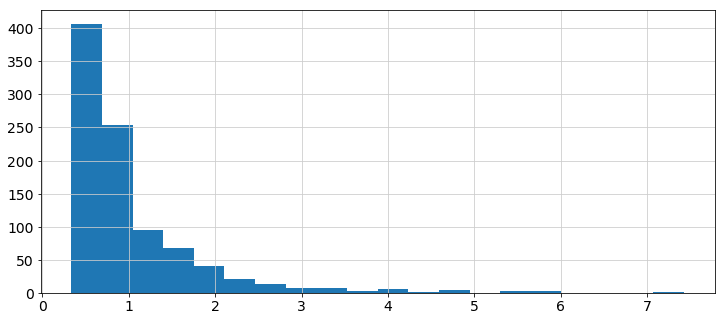

first 5 genes:  [[0.81493974]
 [0.49040034]
 [0.44973624]
 [1.16025317]
 [1.38589478]]


In [9]:
sf = sd.sf(data)
print('first 5 genes: ', sf[0:5])

In [23]:
## 
x = np.array(data.X.todense(),dtype=int)
temp = x.mean(axis=1)/x.mean()
print(temp[0:5])

[0.81493976 0.49040036 0.44973625 1.16025322 1.38589484]


# unit test of  dd_moment_anndata

In [28]:
M,M_ml,gene_list = sd.dd_moment_anndata(data,gamma_c=None,verbose=False,k=4)
print(M[0])
print(M_ml[0])

[  1.60257757   4.13963854  17.70342326 106.98119712]
[  1.60257757   5.74221611  31.72491646 243.78178406]


In [43]:
g1 = np.array(data[:,'Mrpl15'].X,dtype=int)

for i in range(4):
    print('ml',i+1,np.mean(g1**(i+1)))
    
print('dd',1,np.mean(g1))
print('dd',2,np.mean(g1**2-g1))
print('dd',3,np.mean(g1**3-3*g1**2+2*g1))
print('dd',4,np.mean(g1**4-6*g1**3+11*g1**2-6*g1))

ml 1 1.602577873254565
ml 2 5.742212674543501
ml 3 31.7250268528464
ml 4 243.7830290010741
dd 1 1.602577873254565
dd 2 4.139634801288937
dd 3 17.703544575725026
dd 4 106.98174006444683
